In [3]:
import re #pacchetto per espressioni regolari
import os #pacchetto per muoversi nelle cartelle
import sys
sys.path.append('..')  # Add parent directory to the Python path
from utils.helpers import *


In [4]:
train_path = 'data/training.txt'
test_path = 'data/test.txt'

out_dir = 'data/profiling_input'

In [3]:
split = get_split(train_path)
split

'training'

In [ ]:

# Necessario eitchettare il blind test
"""
# Read gold.txt file and extract gender values
with open("data/gold.txt", "r") as gold_file:
    gold_data = gold_file.readlines()

# Extract gender labels
gender_list = [line.split()[1].strip() for line in gold_data]

# Read test.txt file
with open("data/test.txt", "r") as test_file:
    test_data = test_file.readlines()

# Replace "?" with gender labels sequentially
updated_test_data = []
gender_index = 0  # Index to track which gender label to use
in_doc = False
for line in test_data:
    if '<doc id="' in line:
        in_doc = True
        if '?' in line:
            label = gender_list[gender_index]
            updated_line = line.replace("?", label)
            gender_index += 1
        else:
            updated_line = line
    elif "</doc>" in line:
        in_doc = False
        updated_line = line
    elif in_doc:
        # If inside a <doc>...</doc> block, continue appending the lines
        updated_line = line.replace("?", label)
    else:
        updated_line = line
    updated_test_data.append(updated_line)

# Write the updated test data to a new file
with open("data/test.txt", "w") as updated_test_file:
    updated_test_file.writelines(updated_test_data)
"""


In [44]:
for file_path in [train_path, test_path]:
    split = get_split(file_path)

    for line in open(file_path, 'r'):
        line = line.strip() # rimuoviamo eventuali spazi e ritorni a capo

        if '<doc id="' in line:    # troviamo un nuovo documento
            doc_id, genre, gender = get_doc_info(line)
            out_file_name = f'{split}#{doc_id}#{genre}#{gender}.txt'
            out_file_path = os.path.join(out_dir, out_file_name)
            user_post = []

        elif '</doc>' in line:     # fine dell'utente
            with open(out_file_path, 'w') as out_file:
                for post in user_post:
                    out_file.write(post)
                    out_file.write('\n')

        elif line != '':  # siamo in corrispondenza del testo di un post
            user_post.append(line)

In [5]:
import numpy as np

profiling_output_path = 'data/profiling_output/11226.csv'

In [6]:
features_names, documents_info, features = load_dataset(profiling_output_path)

In [7]:
print(f'Numero features: {len(features_names)}')
print('\nLista features:')
print(features_names[:10])

Numero features: 136

Lista features:
['n_sentences', 'n_tokens', 'tokens_per_sent', 'char_per_tok', 'upos_dist_ADJ', 'upos_dist_ADP', 'upos_dist_ADV', 'upos_dist_AUX', 'upos_dist_CCONJ', 'upos_dist_DET']


In [8]:
labels = create_label_list(documents_info)
labels

['F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'M',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'F',
 'F',
 'M',
 'M',
 'F',
 'M',
 'M',
 'M',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'F',
 'F',
 'F',
 'M',
 'F',
 'M',
 'F',
 'F',
 'M',
 'F',
 'M',
 'M',
 'M'

In [9]:
train_features, train_labels, test_features, test_labels = train_test_split(documents_info, features, labels)

print('Documenti training set:', len(train_features), len(train_labels))
print('Documenti test set:', len(test_features), len(test_labels))

Documenti training set: 6000 6000
Documenti test set: 6000 6000


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_features)
X_test = scaler.transform(test_features)

In [11]:
# Conversione in DataFrame senza specificare i nomi delle colonne
save_df(X_train, train_labels, "twitter")
save_df(X_test, test_labels, "twitter_test")

In [12]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search through
param_grid = {
    'C': [10, 1, 0.1, 0.01, 0.001],  # Regularization parameter
    'dual': [True, False]
}

# Initialize SVM with linear kernel
svc = LinearSVC()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, train_labels)

# Get mean test scores across folds
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best score found:", grid_search.best_score_)

c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\corra\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters found: {'C': 10, 'dual': False}
Best score found: 0.627


In [13]:
# Get the best estimator (model) found by grid search
best_model = grid_search.best_estimator_

# Now, you can use this best_model to make predictions on new data
# For example, if you have new data X_new, you can predict its labels as follows:
predictions = best_model.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
test_predictions = predictions
print(classification_report(test_labels, test_predictions, zero_division=0)) # output_dict=True

              precision    recall  f1-score   support

           F       0.54      0.67      0.60      3000
           M       0.56      0.42      0.48      3000

    accuracy                           0.55      6000
   macro avg       0.55      0.55      0.54      6000
weighted avg       0.55      0.55      0.54      6000



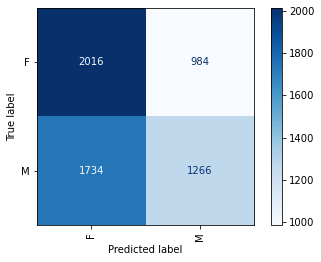

In [15]:
ConfusionMatrixDisplay.from_predictions(test_labels, test_predictions, xticks_rotation='vertical', cmap='Blues')

Feature importance


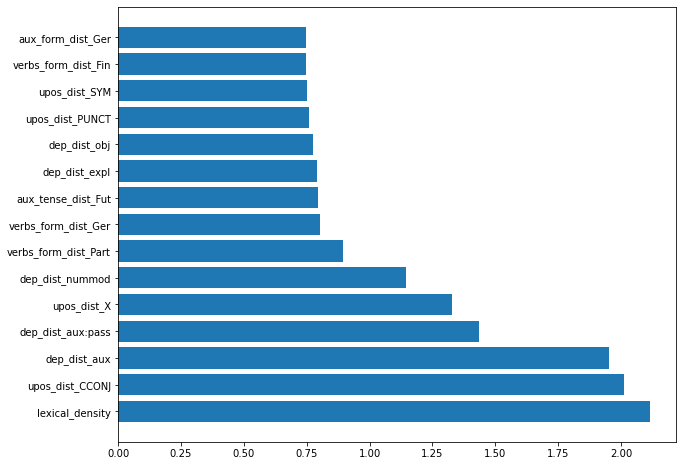

In [17]:
import matplotlib.pyplot as plt

# Assuming `coefs` is your coefficients obtained from the SVM model
# Assuming `features_names` is a list containing the names of your features

coefs = best_model.coef_ # ndarray of shape (1, n_features) if n_classes == 2 else (n_classes, n_features)
coefs.shape
svc=best_model
idx = 0
class_coefs = coefs[idx]

feature_importances = {feature_name: coef for feature_name, coef in zip(features_names, class_coefs)}
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda item: item[1], reverse=True))

num_to_plot = 15
plt.figure(figsize=(10, 8))

print(f'Feature importance')
plt.barh(range(num_to_plot), list(sorted_feature_importances.values())[:num_to_plot], align='center')
plt.yticks(range(num_to_plot), list(sorted_feature_importances.keys())[:num_to_plot])
plt.show()
